# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [14]:
# you are free to use any package you deem fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Dataset

In [2]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

## Testing / Optimization

In [9]:
def get_neighbors(xs, sample, k=5):
    neighbors = [(x, np.sum(np.abs(x - sample))) for x in xs]
    neighbors = sorted(neighbors, key = lambda x : x[1])
    return np.array([x for x, _ in neighbors[ :k]])

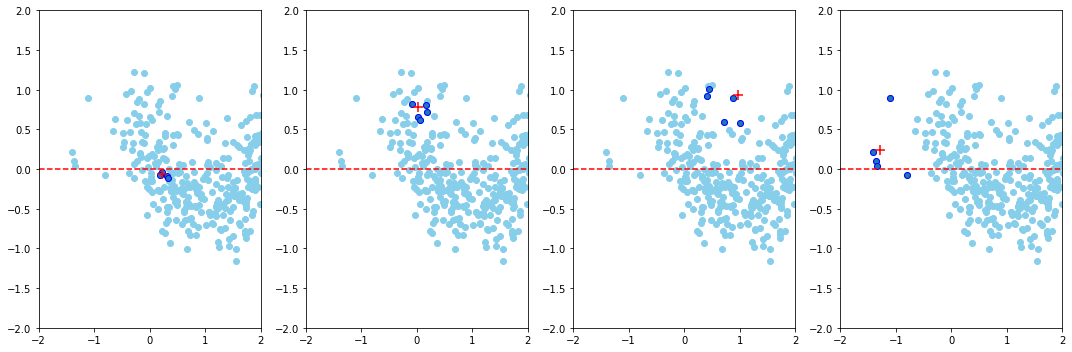

In [21]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
for i in range(4):
    sample = X_test[i]
    neighbors = get_neighbors(X_train, sample, k=5)
    ax[i].scatter(X_train[:, 0], X_train[:, 1], c="skyblue")
    ax[i].scatter(neighbors[:, 0], neighbors[:, 1], edgecolor="blue")
    ax[i].scatter(sample[0], sample[1], marker="+", c="red", s=100)
    ax[i].axhline(y = 0, color = 'r', linestyle = '--')
    ax[i].set(xlim=(-2, 2), ylim=(-2, 2))

plt.tight_layout()

At least three of the four samples we have taken would be correctly predicted

## Performance Analysis

In [16]:
Y_pred_test = knn.predict(X_test)
print (metrics.f1_score(Y_pred_test, Y_test))
print (metrics.accuracy_score(Y_pred_test, Y_test))
print (metrics.recall_score(Y_pred_test, Y_test))

0.9737827715355806
0.9533333333333334
0.9558823529411765


Good!